In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load eBay dataset
ebay_df = pd.read_csv("ebay_cleaned.csv")

# Display basic info
print("eBay Dataset Info:")
print(ebay_df.info())

# Display first few rows
print("\nFirst 5 rows of eBay Data:")
print(ebay_df.head())

eBay Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item ID             82 non-null     object 
 1   Title               82 non-null     object 
 2   Category IDs        82 non-null     int64  
 3   Categories          82 non-null     object 
 4   Price               82 non-null     float64
 5   Item Link           82 non-null     object 
 6   Condition           82 non-null     object 
 7   Seller              82 non-null     object 
 8   Seller Rating       82 non-null     int64  
 9   Item Location       82 non-null     object 
 10  Shipping Cost       82 non-null     float64
 11  Buying Options      82 non-null     object 
 12  Item Creation Date  82 non-null     object 
 13  Adult Only          82 non-null     bool   
 14  Available Coupons   82 non-null     bool   
dtypes: bool(2), float64(2), int64(2), object

In [12]:
# Convert 'Item Creation Date' to datetime
ebay_df['Item Creation Date'] = pd.to_datetime(ebay_df['Item Creation Date'])

In [13]:
# Set the index to date for time series analysis
ebay_df.set_index('Item Creation Date', inplace=True)

In [14]:
# Sort by date
ebay_df = ebay_df.sort_index()

In [15]:
# Aggregate daily sales
daily_sales = ebay_df.resample('D').sum()

(array([20140., 20144., 20148., 20152., 20156., 20160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

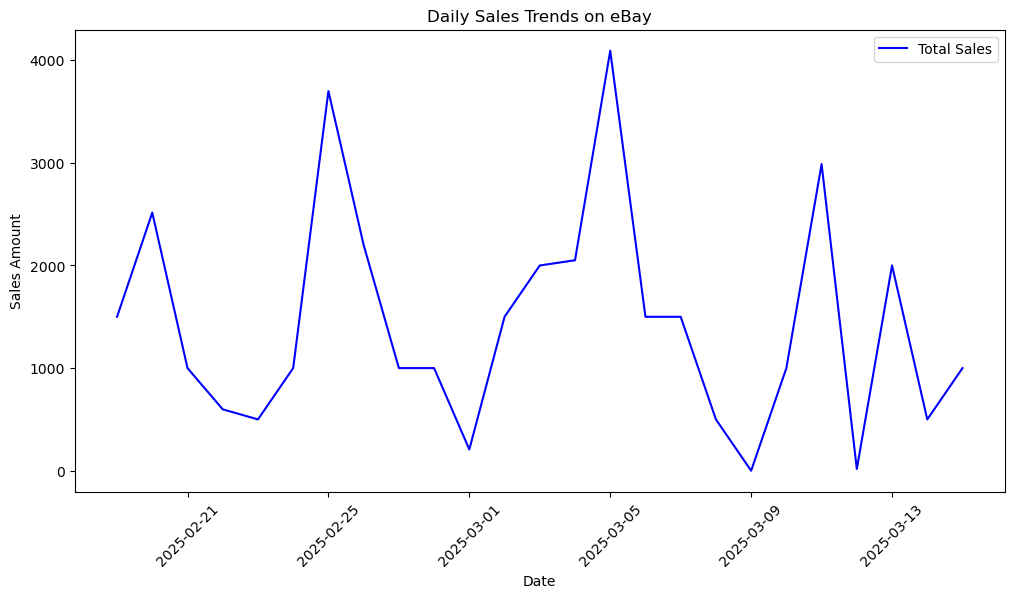

In [16]:
# Plot sales trends
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['Price'], label="Total Sales", color='b')

# Formatting
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Daily Sales Trends on eBay")
plt.legend()
plt.xticks(rotation=45)